In [2]:
# Import packages
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [3]:
# Import data portland_final.csv
df = pd.read_csv("Final_merged_city_portland_with_NAICS.csv")

In [4]:
df = df.drop(columns = ["Unnamed: 0"])

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(2714, 26)

In [7]:
df.head(20)

,Unnamed: 0.1,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,totalEstab,maxNaics_emp
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2601.0,5717.0,3699.0,294.0,356.0,...,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994,23,95,23
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2826.0,6037.0,4024.0,368.0,476.0,...,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908,23,92,23
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2868.0,6153.0,4090.0,369.0,507.0,...,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533,23,85,23
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2876.0,6022.0,3931.0,296.0,404.0,...,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517,23,86,23
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3078.0,6181.0,4094.0,316.0,457.0,...,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392,23,89,23
5,2447,41051010402,POINT (-122.3356858461854 45.48565778402043),2015,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3063.0,6349.0,4184.0,346.0,517.0,...,0.118916,0.596026,0.029383,0.049298,0.841659,0.016650,0.026118,23,87,23
6,2450,41051010402,POINT (-122.3356596646475 45.48564052912985),2016,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3190.0,6566.0,4383.0,334.0,540.0,...,0.128389,0.813187,0.023197,0.028527,0.878056,0.000000,0.033856,23,87,23
7,2453,41051010402,POINT (-122.3356596646475 45.48564052912985),2017,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3456.0,6981.0,4633.0,399.0,485.0,...,0.133792,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880,23,97,23
8,2536,41051010500,POINT (-122.08527042624 45.52768157713402),2010,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1765.0,3944.0,2580.0,258.0,313.0,...,0.107759,1.000000,0.012465,0.012465,0.803966,0.002266,0.031161,44,6,72
200,2539,41051010500,POINT (-122.08527042624 45.52768157713402),2011,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1796.0,4138.0,2803.0,247.0,284.0,...,0.106573,1.000000,0.004454,0.004454,0.827951,0.005011,0.027283,44,6,72


In [8]:
# Check all column names
df.columns

Index(['Unnamed: 0.1', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'maxNaics_est', 'totalEstab',
       'maxNaics_emp'],
      dtype='object')

In [9]:
# Calculate the total population with college degrees
df["total_college"] = df["collegemale"] + df["collegefemale"]

# Calculate the ratio of people with college degree vs education population
df["college_ratio"] = df["total_college"] / df["edut"]

# Calculate the ratio of people with college degree vs total population
df["college_ratio_pop"] = df["total_college"] / df["pop"]

In [10]:
data = df[["zipcode", "geo_id", "year", "pop", "households", "income", "edut", "total_college", "college_ratio",
          "ratio_65", "ratio_22_50", "college_ratio_pop", "bus_ratio", 
           "bus_ratio_total", "public_ratio", "car_ratio", "bicy_ratio", "walked_ratio", "maxNaics_est",
           "maxNaics_emp", "Empratio", "estabratio"]]

In [11]:
data.head(10)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,Empratio,estabratio
0,97009,41051010402,2010,5717.0,162.0,1859.0,3699.0,650.0,0.175723,0.391464,...,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994,23,23,0.000000,0.000000
1,97009,41051010402,2011,6037.0,149.0,1960.0,4024.0,844.0,0.209742,0.405831,...,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908,23,23,0.000000,0.000000
2,97009,41051010402,2012,6153.0,139.0,1998.0,4090.0,876.0,0.214181,0.393954,...,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533,23,23,0.000000,0.000000
3,97009,41051010402,2013,6022.0,129.0,2087.0,3931.0,700.0,0.178072,0.366490,...,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517,23,23,0.000000,0.000000
4,97009,41051010402,2014,6181.0,120.0,2191.0,4094.0,773.0,0.188813,0.387316,...,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392,23,23,0.000000,0.000000
5,97009,41051010402,2015,6349.0,116.0,2201.0,4184.0,863.0,0.206262,0.382107,...,0.596026,0.029383,0.049298,0.841659,0.016650,0.026118,23,23,0.000000,0.000000
6,97009,41051010402,2016,6566.0,117.0,2201.0,4383.0,874.0,0.199407,0.362473,...,0.813187,0.023197,0.028527,0.878056,0.000000,0.033856,23,23,0.000000,0.000000
7,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880,23,23,0.000000,0.000000
8,97014,41051010500,2010,3944.0,106.0,1320.0,2580.0,571.0,0.221318,0.259381,...,1.000000,0.012465,0.012465,0.803966,0.002266,0.031161,44,72,255.555556,17.888889
200,97014,41051010500,2011,4138.0,107.0,1428.0,2803.0,531.0,0.189440,0.301112,...,1.000000,0.004454,0.004454,0.827951,0.005011,0.027283,44,72,249.166667,17.250000


In [12]:
data_2017 = data[data["year"] == 2017]

In [13]:
data_2017.head()

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,Empratio,estabratio
7,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880,23,23,0.000000,0.000000
1352,97014,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938,42,42,63.888889,6.388889
1551,97019,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938,23,23,292.622951,29.262295
1608,97024,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.792683,0.036806,0.046433,0.852208,0.024915,0.018120,23,42,2.129630,0.190741
1610,97024,41051010100,2017,8755.0,190.0,3728.0,6112.0,914.0,0.149542,0.382524,...,1.000000,0.081324,0.081324,0.879169,0.000000,0.009492,23,42,920.000000,82.400000


In [14]:
data_2017["geo_id"].nunique()

171

In [15]:
data["geo_id"].nunique()

171

In [16]:
data_2016 = data[data["year"] != 2017]

In [17]:
data_2017.to_csv("Portland_NAICS_2017.csv")

In [18]:
data_2016.to_csv("Portland_NAICS_before_2017.csv")

In [19]:
data_temp_2017 = data_2017.dropna()

In [20]:
data_temp_2017.shape

(336, 22)

In [21]:
data_2017.shape

(338, 22)

In [22]:
data_temp_2017["geo_id"].nunique()

170

In [23]:
data_2017["maxNaics_est"].nunique()

6

In [24]:
data_2017["maxNaics_est"].unique()

array([23, 42, 62, 54, 72, 81])

In [25]:
data_2016["maxNaics_est"].nunique()

9

In [26]:
data_2016["maxNaics_est"].unique()

array([23, 44, 42, 72, 53, 54, 62, 48, 81])

# Decision Tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
# First, create our X and y
# Split into test and train set
data_2017 = data_2017.dropna()
data_2016 = data_2016.dropna()

X_train = data_2016.loc[ : , "pop":"walked_ratio"]
y_train = data_2016.loc[ : , "maxNaics_est"]
X_test = data_2017.loc[ : , "pop":"walked_ratio"]
y_test = data_2017.loc[ : , "maxNaics_est"]

In [29]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,51), 'max_leaf_nodes':range(2,51)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train)
print(rs.best_params_)
print(rs.score(X_test, y_test))

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'max_depth': 8, 'max_leaf_nodes': 14}
0.45535714285714285


In [42]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
5,college_ratio,0.302903
13,bicy_ratio,0.163864
12,car_ratio,0.125768
11,public_ratio,0.0782812
9,bus_ratio,0.0598312


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random forest model
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1,max_leaf_nodes=70)
rf.fit(X_train, y_train)
print (rf.score(X_test, y_test))

0.5297619047619048


In [30]:
data_2017["y_pred"] = rf.predict(X_test)

In [31]:
rf.predict(X_test)

array([23, 72, 72, 62, 62, 62, 62, 62, 62, 62, 23, 62, 62, 62, 62, 62, 62,
       62, 23, 62, 62, 54, 54, 54, 54, 54, 62, 62, 62, 62, 23, 23, 62, 72,
       62, 62, 23, 62, 23, 23, 62, 23, 62, 23, 23, 62, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 62, 62, 72, 62, 72, 72, 62, 72, 72, 54, 54,
       72, 54, 54, 62, 72, 54, 72, 72, 72, 54, 72, 62, 54, 54, 54, 54, 54,
       62, 72, 62, 62, 62, 62, 62, 72, 62, 62, 72, 62, 62, 62, 62, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 72,
       72, 72, 72, 72, 72, 54, 72, 72, 72, 62, 72, 62, 62, 54, 54, 72, 54,
       54, 54, 54, 54, 54, 72, 72, 72, 72, 54, 62, 62, 62, 54, 54, 62, 62,
       62, 62, 72, 62, 54, 72, 54, 54, 54, 54, 62, 62, 54, 54, 62, 72, 62,
       62, 62, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 72, 54, 72, 72, 62,
       72, 72, 72, 72, 72, 54, 72, 62, 54, 62, 72, 72, 62, 72, 62, 62, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 62, 62, 62, 62, 62,
       62, 62, 62, 62, 62

In [33]:
data_2017 = data_2017.drop(columns=["Empratio","estabratio"])

In [34]:
data_2017.head(10)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,college_ratio_pop,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,y_pred
7,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.126629,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880,23,23,23
1352,97014,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.140849,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938,42,42,72
1551,97019,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.140849,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938,23,23,72
1608,97024,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.073195,0.792683,0.036806,0.046433,0.852208,0.024915,0.018120,23,42,62
1610,97024,41051010100,2017,8755.0,190.0,3728.0,6112.0,914.0,0.149542,0.382524,...,0.104397,1.000000,0.081324,0.081324,0.879169,0.000000,0.009492,23,42,62
1612,97024,41051010200,2017,6251.0,114.0,2430.0,4542.0,657.0,0.144650,0.377860,...,0.105103,0.614286,0.028772,0.046838,0.887253,0.000000,0.011710,23,42,62
1614,97024,41051010304,2017,4393.0,136.0,1390.0,2648.0,193.0,0.072885,0.425905,...,0.043934,0.884298,0.056524,0.063920,0.851558,0.000000,0.032224,23,42,62
1714,97030,41051009801,2017,4583.0,104.0,1455.0,2644.0,124.0,0.046899,0.362426,...,0.027057,0.571906,0.101604,0.177659,0.715389,0.000000,0.058229,62,62,62
1715,97030,41051009803,2017,7978.0,131.0,2577.0,5328.0,677.0,0.127065,0.385184,...,0.084858,0.957237,0.085917,0.089755,0.793918,0.016829,0.059345,62,62,62
1716,97030,41051009904,2017,3962.0,147.0,1416.0,2545.0,375.0,0.147348,0.368501,...,0.094649,0.811966,0.051998,0.064039,0.803503,0.006568,0.020799,62,62,62


In [35]:
data_2017["Naics_score"] = np.where(data_2017["maxNaics_est"]==data_2017["y_pred"], 10, 5)

In [36]:
data_2017.head(10)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,y_pred,Naics_score
7,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880,23,23,23,10
1352,97014,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938,42,42,72,5
1551,97019,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938,23,23,72,5
1608,97024,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.792683,0.036806,0.046433,0.852208,0.024915,0.018120,23,42,62,5
1610,97024,41051010100,2017,8755.0,190.0,3728.0,6112.0,914.0,0.149542,0.382524,...,1.000000,0.081324,0.081324,0.879169,0.000000,0.009492,23,42,62,5
1612,97024,41051010200,2017,6251.0,114.0,2430.0,4542.0,657.0,0.144650,0.377860,...,0.614286,0.028772,0.046838,0.887253,0.000000,0.011710,23,42,62,5
1614,97024,41051010304,2017,4393.0,136.0,1390.0,2648.0,193.0,0.072885,0.425905,...,0.884298,0.056524,0.063920,0.851558,0.000000,0.032224,23,42,62,5
1714,97030,41051009801,2017,4583.0,104.0,1455.0,2644.0,124.0,0.046899,0.362426,...,0.571906,0.101604,0.177659,0.715389,0.000000,0.058229,62,62,62,10
1715,97030,41051009803,2017,7978.0,131.0,2577.0,5328.0,677.0,0.127065,0.385184,...,0.957237,0.085917,0.089755,0.793918,0.016829,0.059345,62,62,62,10
1716,97030,41051009904,2017,3962.0,147.0,1416.0,2545.0,375.0,0.147348,0.368501,...,0.811966,0.051998,0.064039,0.803503,0.006568,0.020799,62,62,62,10


In [37]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
5,college_ratio,0.110993
8,college_ratio_pop,0.102491
13,bicy_ratio,0.0913703
12,car_ratio,0.0811143
14,walked_ratio,0.0765816
9,bus_ratio,0.0751106
11,public_ratio,0.0629499
6,ratio_65,0.0617329
7,ratio_22_50,0.0616351
2,income,0.0532856


# SVM

In [59]:
from sklearn import svm
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


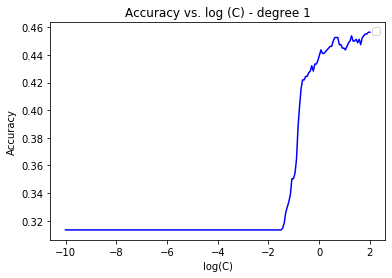

No handles with labels found to put in legend.


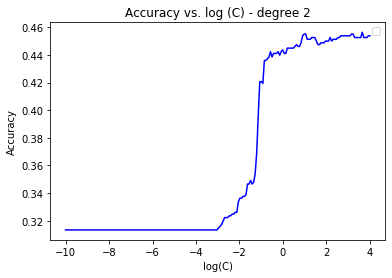

No handles with labels found to put in legend.


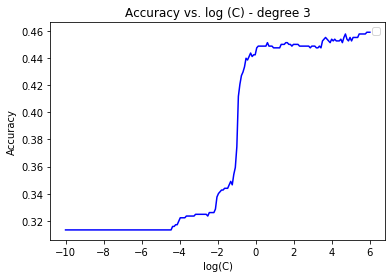

No handles with labels found to put in legend.


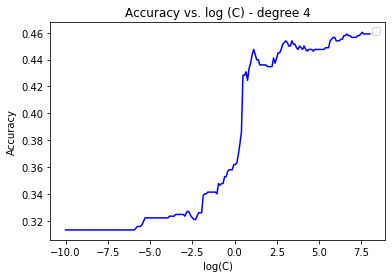

In [60]:
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train, test_size=0.33, random_state=2020)
# Compute and plot the accuracy vs log(C)
for i in range(1,5):
    C = [np.exp(i) for i in np.linspace(-10,2*i,200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',degree=i, C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.title("Accuracy vs. log (C) - degree {}".format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

In [62]:
# Let's use polynomial SVM with degree 2

clf_2 = svm.SVC(kernel = "poly", degree = 2) 
clf_2.fit(X_train, y_train)
print ("In sample, we successfully predict {} percent of the data".format((y_train == clf_2.predict(X_train)).sum()*100/len(y_train)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test == clf_2.predict(X_test)).sum()*100/len(y_test)))

In sample, we successfully predict 42.77871621621622 percent of the data
Out of sample, we successfully predict 38.392857142857146 percent of the data


In [63]:
clf_l = svm.SVC(kernel = "linear", C = 20) 
clf_l.fit(X_train, y_train)
print ("In sample, we successfully predict {} percent of the data".format((y_train == clf_l.predict(X_train)).sum()*100/len(y_train)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test == clf_l.predict(X_test)).sum()*100/len(y_test)))

In sample, we successfully predict 34.62837837837838 percent of the data
Out of sample, we successfully predict 42.857142857142854 percent of the data


# CityIQ

In [38]:
CityIQ = pd.read_csv("CityIQ_pedveh_Count.csv")

In [39]:
CityIQ.head(10)

,geo_id,geometry,pedestrianCountSum,vehicleCountSum
0,41051010402,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22
1,41051010500,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22
2,41051009603,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22
3,41051010100,MULTIPOLYGON (((-122.4566475168594 45.53948853...,22.0,707.22
4,41051010200,MULTIPOLYGON (((-122.5865501307936 45.59923808...,22.0,707.22
5,41051010304,MULTIPOLYGON (((-122.4336984445508 45.53666662...,22.0,707.22
6,41051009801,MULTIPOLYGON (((-122.475774467029 45.519147438...,22.0,707.22
7,41051009803,MULTIPOLYGON (((-122.4847343307979 45.48649133...,22.0,707.22
8,41051009904,MULTIPOLYGON (((-122.4676063127464 45.48870040...,22.0,707.22
9,41051009906,MULTIPOLYGON (((-122.4483452516475 45.48095745...,22.0,707.22


In [40]:
CityIQ["geo_id"].nunique()

171

# Merge

In [43]:
data_final = pd.merge(data_2017, CityIQ, on = "geo_id")
data_final.head(10)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,car_ratio,bicy_ratio,walked_ratio,maxNaics_est,maxNaics_emp,y_pred,Naics_score,geometry,pedestrianCountSum,vehicleCountSum
0,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.882523,0.000000,0.035880,23,23,23,10,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22
1,97060,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.882523,0.000000,0.035880,72,72,23,5,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22
2,97080,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.882523,0.000000,0.035880,23,23,23,10,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22
3,97014,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.833876,0.005863,0.016938,42,42,72,5,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22
4,97019,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.833876,0.005863,0.016938,23,23,72,5,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22
5,97060,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.833876,0.005863,0.016938,72,72,72,10,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22
6,97024,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.852208,0.024915,0.018120,23,42,62,5,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22
7,97230,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.852208,0.024915,0.018120,42,42,62,5,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22
8,97233,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.852208,0.024915,0.018120,62,62,62,10,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22
9,97024,41051010100,2017,8755.0,190.0,3728.0,6112.0,914.0,0.149542,0.382524,...,0.879169,0.000000,0.009492,23,42,62,5,MULTIPOLYGON (((-122.4566475168594 45.53948853...,22.0,707.22


In [45]:
data_2017.shape

(336, 22)

In [46]:
data_final.shape

(336, 25)

In [47]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler=MinMaxScaler(feature_range=(1,5))
data_final['pedestrian_scaled'] = scaler.fit_transform(data_final[["pedestrianCountSum"]])

In [48]:
scaler=MinMaxScaler(feature_range=(1,5))
data_final['vehicle_scaled'] = scaler.fit_transform(data_final[["vehicleCountSum"]])

In [49]:
data_final.head(10)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,walked_ratio,maxNaics_est,maxNaics_emp,y_pred,Naics_score,geometry,pedestrianCountSum,vehicleCountSum,pedestrian_scaled,vehicle_scaled
0,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.035880,23,23,23,10,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22,2.791274,2.813273
1,97060,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.035880,72,72,23,5,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22,2.791274,2.813273
2,97080,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,0.035880,23,23,23,10,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22,2.791274,2.813273
3,97014,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.016938,42,42,72,5,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22,2.791274,2.813273
4,97019,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.016938,23,23,72,5,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22,2.791274,2.813273
5,97060,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,0.016938,72,72,72,10,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22,2.791274,2.813273
6,97024,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.018120,23,42,62,5,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22,2.791274,2.813273
7,97230,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.018120,42,42,62,5,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22,2.791274,2.813273
8,97233,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,0.018120,62,62,62,10,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22,2.791274,2.813273
9,97024,41051010100,2017,8755.0,190.0,3728.0,6112.0,914.0,0.149542,0.382524,...,0.009492,23,42,62,5,MULTIPOLYGON (((-122.4566475168594 45.53948853...,22.0,707.22,2.791274,2.813273


In [50]:
data_final["pedestrian_scaled"].nunique()

12

# Sentiment score and ratings

In [52]:
score = pd.read_csv("total_score1.csv")

In [53]:
score.head(20)

,geo_id,code,sentiment_score,ratings
0,41051000100,23,0.351783,3.750000
1,41051000100,42,0.541091,4.417722
2,41051000100,48,0.408414,4.142857
3,41051000100,54,0.422516,4.200000
4,41051000100,62,0.062817,3.500000
5,41051000100,72,0.596488,4.288462
6,41051000100,81,0.254379,4.210526
7,41051000200,23,0.491757,4.571429
8,41051000200,42,0.477693,4.300000
9,41051000200,48,0.303358,4.625000


In [54]:
score["geo_id"].nunique()

159

In [188]:
data_score = pd.merge(data_final, score, how="left", left_on=["geo_id","maxNaics_est"], right_on=["geo_id","code"])

In [189]:
data_score.head(40)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,y_pred,Naics_score,geometry,pedestrianCountSum,vehicleCountSum,pedestrian_scaled,vehicle_scaled,code,sentiment_score,ratings
0,97009,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,23,10,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
1,97060,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,23,5,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
2,97080,41051010402,2017,6981.0,115.0,2303.0,4633.0,884.0,0.190805,0.355966,...,23,10,MULTIPOLYGON (((-122.3868792758254 45.51902980...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
3,97014,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,72,5,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
4,97019,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,72,5,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
5,97060,41051010500,2017,3912.0,122.0,1466.0,2732.0,551.0,0.201684,0.224949,...,72,10,MULTIPOLYGON (((-122.3970989671113 45.57260058...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
6,97024,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,62,5,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
7,97230,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,62,5,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22,2.791274,2.813273,42.0,-0.169820,4.700000
8,97233,41051009603,2017,4044.0,119.0,1229.0,2533.0,296.0,0.116857,0.370425,...,62,10,MULTIPOLYGON (((-122.4661255423961 45.53952849...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN
9,97024,41051010100,2017,8755.0,190.0,3728.0,6112.0,914.0,0.149542,0.382524,...,62,5,MULTIPOLYGON (((-122.4566475168594 45.53948853...,22.0,707.22,2.791274,2.813273,NaN,NaN,NaN


In [192]:
data_score = data_score[["zipcode", "geo_id","year","maxNaics_est","y_pred","Naics_score","pedestrian_scaled",
                        "vehicle_scaled","sentiment_score","ratings"]]

In [193]:
data_score.head(40)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,NaN,NaN
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,NaN,NaN
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,NaN,NaN
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,NaN,NaN
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,NaN,NaN
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,NaN,NaN
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,NaN,NaN
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.169820,4.700000
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,NaN,NaN
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,NaN,NaN


In [83]:
data_score.shape

(336, 11)

In [84]:
data_score["sentiment_score"].nunique()

161

In [85]:
data_score["ratings"].nunique()

106

In [86]:
data_score["geo_id"].nunique()

170

In [87]:
sample = data_score[data_score["geo_id"] == 41051000200]
sample

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,code,sentiment_score,ratings
86,97202,41051000200,2017,72,62,5,2.791274,2.813273,72.0,0.455837,4.064516
87,97222,41051000200,2017,62,62,10,2.791274,2.813273,62.0,0.048471,5.000000


In [88]:
sample2 = score[score["geo_id"] == 41051009603]
sample2

,geo_id,code,sentiment_score,ratings
648,41051009603,42,-0.169820,4.7
649,41051009603,54,0.516800,3.0
650,41051009603,81,0.545367,4.5


In [194]:
data_score["sentiment_score"].isna().sum()

125

# Sentiment score & ratings preprocessing

In [195]:
data_score["sentiment_score"] = data_score["sentiment_score"].replace(np.nan, 0)

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
data_score.head(10)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.00000,NaN
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,0.00000,NaN
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.00000,NaN
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,0.00000,NaN
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.00000,NaN
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,0.00000,NaN
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.00000,NaN
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.16982,4.7
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,0.00000,NaN
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.00000,NaN


In [197]:
data_score["ratings"].median(skipna=True)

4.166666666666667

In [198]:
data_score["ratings"].mean(skipna=True)

4.131740191447301

In [199]:
data_score["ratings"] = data_score["ratings"].replace(np.nan, data_score["ratings"].median(skipna=True))

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
data_score.head(20)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,0.000000,4.166667
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,0.000000,4.166667
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.000000,4.166667
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,0.000000,4.166667
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.000000,4.166667
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.169820,4.700000
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,0.000000,4.166667
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.000000,4.166667


# Merge estabratio

In [231]:
estab = pd.read_csv("Final_merged_city_portland.csv")

In [232]:
estab.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2601.0,5717.0,3699.0,294.0,356.0,...,0.0,0.0,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2826.0,6037.0,4024.0,368.0,476.0,...,0.0,0.0,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2868.0,6153.0,4090.0,369.0,507.0,...,0.0,0.0,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2876.0,6022.0,3931.0,296.0,404.0,...,0.0,0.0,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3078.0,6181.0,4094.0,316.0,457.0,...,0.0,0.0,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392


In [233]:
estab.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio'],
      dtype='object')

In [234]:
estab = estab[estab["year"]==2017]

In [235]:
estab.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
7,2453,41051010402,POINT (-122.3356596646475 45.48564052912985),2017,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3456.0,6981.0,4633.0,399.0,485.0,...,0.000000,0.000000,0.355966,0.133792,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880
15,2557,41051010500,POINT (-122.0852430195605 45.52765726906909),2017,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1535.0,3912.0,2732.0,245.0,306.0,...,63.888889,6.388889,0.224949,0.214468,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938
23,2558,41051010500,POINT (-122.0852430195605 45.52765726906909),2017,MULTIPOLYGON (((-122.3970989671113 45.57260058...,1535.0,3912.0,2732.0,245.0,306.0,...,292.622951,29.262295,0.224949,0.214468,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938
31,2109,41051009603,POINT (-122.4607256890022 45.52919102699193),2017,MULTIPOLYGON (((-122.4661255423961 45.53952849...,1766.0,4044.0,2533.0,119.0,177.0,...,2.129630,0.190741,0.370425,0.116716,0.792683,0.036806,0.046433,0.852208,0.024915,0.018120
39,2356,41051010100,POINT (-122.444171605879 45.52613866368701),2017,MULTIPOLYGON (((-122.4566475168594 45.53948853...,3898.0,8755.0,6112.0,363.0,551.0,...,920.000000,82.400000,0.382524,0.145060,1.000000,0.081324,0.081324,0.879169,0.000000,0.009492


In [236]:
estab = estab[["geo_id", "zipcode", "centroid", "geometry" ,"estabratio"]]

In [237]:
estab.head(20)

,geo_id,zipcode,centroid,geometry,estabratio
7,41051010402,97009,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,0.000000
15,41051010500,97014,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,6.388889
23,41051010500,97019,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,29.262295
31,41051009603,97024,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,0.190741
39,41051010100,97024,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,82.400000
47,41051010200,97024,POINT (-122.4781708493357 45.56549471572949),MULTIPOLYGON (((-122.5865501307936 45.59923808...,16.403704
55,41051010304,97024,POINT (-122.4241039339755 45.5344353660501),MULTIPOLYGON (((-122.4336984445508 45.53666662...,4.005556
63,41051009801,97030,POINT (-122.4653739694945 45.51181468554469),MULTIPOLYGON (((-122.475774467029 45.519147438...,33.266907
71,41051009803,97030,POINT (-122.4739791885148 45.49643517340344),MULTIPOLYGON (((-122.4847233336846 45.48719233...,22.739405
79,41051009904,97030,POINT (-122.4538078853403 45.4931553136304),MULTIPOLYGON (((-122.4676063127464 45.48870040...,1.684400


In [238]:
data_final_score = pd.merge(data_score, estab, how="left", left_on=["geo_id", "zipcode"], right_on=["geo_id", "zipcode"])

In [239]:
data_final_score.head(20)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,0.000000
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,10.113507
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,82.431507
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,6.388889
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,29.262295
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,3.708286
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,0.190741
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.169820,4.700000,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,27.738516
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,8.144796
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,82.400000


In [240]:
data_final_score.shape

(336, 13)

In [241]:
data_final_score = data_final_score.drop_duplicates()

In [242]:
data_final_score.shape

(328, 13)

In [243]:
data_final_score.head(20)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,0.000000
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,10.113507
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,82.431507
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,6.388889
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,29.262295
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,3.708286
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,0.190741
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.169820,4.700000,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,27.738516
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,8.144796
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,82.400000


## Scale sentiment score, ratings, and estabratio

In [244]:
data_final_score["sentiment_score"] = data_final_score["sentiment_score"]*2.5

In [245]:
scaler=MinMaxScaler(feature_range=(1,5))
data_final_score["estabratio"] = scaler.fit_transform(data_final_score[["estabratio"]])

In [246]:
data_final_score.head(20)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.000000
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.033908
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.276375
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.021421
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.098110
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.012433
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.000640
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.424550,4.700000,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.093001
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.027308
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,1.276269


# Compute the final score

In [247]:
data_final_score["final_score"] = data_final_score["Naics_score"] + data_final_score["pedestrian_scaled"]\
        + data_final_score["vehicle_scaled"] + data_final_score["sentiment_score"]\
        + data_final_score["ratings"] + data_final_score["estabratio"]

In [248]:
data_final_score.head(20)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.000000,20.771214
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.033908,15.805122
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.276375,21.047589
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.021421,15.792635
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.098110,15.869324
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.012433,20.783647
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.000640,15.771853
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.424550,4.700000,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.093001,15.972998
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.027308,20.798522
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,1.276269,16.047483


In [249]:
data_final_score["final_score"] = data_final_score["final_score"]/3.25
data_final_score.head(20)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.000000,6.391143
1,97060,41051010402,2017,72,23,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.033908,4.863115
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.276375,6.476181
3,97014,41051010500,2017,42,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.021421,4.859272
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.098110,4.882869
5,97060,41051010500,2017,72,72,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.012433,6.394968
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.000640,4.852878
7,97230,41051009603,2017,42,62,5,2.791274,2.813273,-0.424550,4.700000,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.093001,4.914769
8,97233,41051009603,2017,62,62,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.027308,6.399545
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,1.276269,4.937687


# Rank for each Naics code

In [250]:
data_naics_23 = data_final_score[data_final_score["maxNaics_est"] == 23]
data_naics_42 = data_final_score[data_final_score["maxNaics_est"] == 42]
data_naics_54 = data_final_score[data_final_score["maxNaics_est"] == 54]
data_naics_62 = data_final_score[data_final_score["maxNaics_est"] == 62]
data_naics_72 = data_final_score[data_final_score["maxNaics_est"] == 72]
data_naics_81 = data_final_score[data_final_score["maxNaics_est"] == 81]

In [251]:
data_naics_23.head()

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.0,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.000000,6.391143
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.0,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.276375,6.476181
4,97019,41051010500,2017,23,72,5,2.791274,2.813273,0.0,4.166667,POINT (-122.0852430195605 45.52765726906909),MULTIPOLYGON (((-122.3970989671113 45.57260058...,1.098110,4.882869
6,97024,41051009603,2017,23,62,5,2.791274,2.813273,0.0,4.166667,POINT (-122.4607256890022 45.52919102699193),MULTIPOLYGON (((-122.4661255423961 45.53952849...,1.000640,4.852878
9,97024,41051010100,2017,23,62,5,2.791274,2.813273,0.0,4.166667,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,1.276269,4.937687


In [252]:
print(data_naics_23.shape)
print(data_naics_42.shape)
print(data_naics_54.shape)
print(data_naics_62.shape)
print(data_naics_72.shape)
print(data_naics_81.shape)

(37, 14)
(24, 14)
(79, 14)
(86, 14)
(97, 14)
(5, 14)


## Sort by the final_score

In [253]:
data_naics_23 = data_naics_23.sort_values(by = "final_score", ascending = False)
data_naics_42 = data_naics_42.sort_values(by = "final_score", ascending = False)
data_naics_54 = data_naics_54.sort_values(by = "final_score", ascending = False)
data_naics_62 = data_naics_62.sort_values(by = "final_score", ascending = False)
data_naics_72 = data_naics_72.sort_values(by = "final_score", ascending = False)
data_naics_81 = data_naics_81.sort_values(by = "final_score", ascending = False)

In [254]:
data_naics_23.head(10)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
64,97080,41051010409,2017,23,23,10,2.791274,2.813273,0.825917,5.000000,POINT (-122.3854651713217 45.47608662598248),MULTIPOLYGON (((-122.4016272228507 45.49274769...,1.147717,6.947133
26,97080,41051009906,2017,23,23,10,2.791274,2.813273,0.546500,5.000000,POINT (-122.4365630528267 45.48391162845191),MULTIPOLYGON (((-122.4483452516475 45.48095745...,1.014295,6.820105
38,97080,41051010408,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4046341072802 45.48519356722644),MULTIPOLYGON (((-122.4138962754812 45.50169167...,1.462213,6.533362
2,97080,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.276375,6.476181
61,97080,41051009903,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4702621896406 45.47307320369288),MULTIPOLYGON (((-122.4943642936196 45.47401524...,1.033356,6.401406
63,97080,41051009905,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.459602041916 45.48522009326165),MULTIPOLYGON (((-122.4754713193627 45.48726437...,1.009530,6.394075
62,97236,41051009903,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4702621896406 45.47307320369288),MULTIPOLYGON (((-122.4943642936196 45.47401524...,1.002846,6.392018
0,97009,41051010402,2017,23,23,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.3356596646475 45.48564052912985),MULTIPOLYGON (((-122.3868792758254 45.51902980...,1.000000,6.391143
318,97236,41051009701,2017,23,62,5,2.791274,2.813273,1.764167,5.000000,POINT (-122.5036644350073 45.51177979964492),MULTIPOLYGON (((-122.5107274895271 45.51021129...,1.034147,5.662419
330,97236,41051009102,2017,23,62,5,2.791274,2.813273,1.400292,4.500000,POINT (-122.5064165476355 45.48846792324808),MULTIPOLYGON (((-122.5235684070879 45.48870619...,1.150816,5.432509


In [255]:
# 23: Construction
data_naics_23["geo_id"].unique()[:5]

array([41051010409, 41051009906, 41051010408, 41051010402, 41051009903])

In [256]:
data_naics_42.head(10)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
11,97230,41051010100,2017,42,62,5,2.791274,2.813273,1.562250,5.000000,POINT (-122.444171605879 45.52613866368701),MULTIPOLYGON (((-122.4566475168594 45.53948853...,1.000000,5.589784
311,97230,41051009606,2017,42,62,5,2.791274,2.813273,1.435071,4.357143,POINT (-122.4867671222192 45.52277890014595),MULTIPOLYGON (((-122.4964545282071 45.52219635...,1.066961,5.373453
196,97218,41051003603,2017,42,72,5,2.791274,2.813273,1.595344,4.062500,POINT (-122.6254322033497 45.56777729892097),MULTIPOLYGON (((-122.6306520415236 45.56823789...,1.006113,5.313386
298,97230,41051009502,2017,42,62,5,2.791274,2.813273,1.121970,4.300000,POINT (-122.5281104930505 45.55079586676066),MULTIPOLYGON (((-122.5381998047301 45.55725823...,1.137642,5.281280
15,97230,41051010200,2017,42,62,5,2.791274,2.813273,0.728865,4.166667,POINT (-122.4781708493357 45.56549471572949),MULTIPOLYGON (((-122.5865501307936 45.59923808...,1.639848,5.273823
242,97218,41051007500,2017,42,62,5,2.791274,2.813273,1.255954,4.074074,POINT (-122.6089850399766 45.55687373540734),MULTIPOLYGON (((-122.6204229917858 45.56279793...,1.127160,5.249764
179,97218,41051003000,2017,42,72,5,2.791274,2.813273,0.955193,4.318182,POINT (-122.6238894923057 45.55475833740645),MULTIPOLYGON (((-122.6306839402941 45.55006288...,1.033013,5.203365
307,97230,41051009501,2017,42,62,5,2.791274,2.813273,0.710625,4.500000,POINT (-122.5089384760592 45.54757042351232),MULTIPOLYGON (((-122.5373407516222 45.54804423...,1.070681,5.195647
256,97230,41051008100,2017,42,62,5,2.791274,2.813273,0.894216,4.288945,POINT (-122.5525273753115 45.52804897124058),MULTIPOLYGON (((-122.568607709552 45.529861101...,1.020460,5.171744
204,97230,41051007300,2017,42,62,5,2.791274,2.813273,0.631953,3.623446,POINT (-122.588354801612 45.58159415179215),MULTIPOLYGON (((-122.6463651618068 45.58447684...,1.805390,5.127796


In [257]:
# 42: Wholesale Trade
data_naics_42["geo_id"].unique()[:5]

array([41051010100, 41051009606, 41051003603, 41051009502, 41051010200])

In [258]:
data_naics_54.head(10)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
82,97204,41051010600,2017,54,54,10,2.791274,2.813273,1.061199,4.129683,POINT (-122.6761276296978 45.5186862129659),MULTIPOLYGON (((-122.6848688715688 45.51920967...,5.000000,7.937055
83,97205,41051010600,2017,54,54,10,2.791274,2.813273,1.061199,4.129683,POINT (-122.6761276296978 45.5186862129659),MULTIPOLYGON (((-122.6848688715688 45.51920967...,3.747720,7.551738
102,97214,41051001101,2017,54,54,10,2.791274,2.860192,1.266914,4.245902,POINT (-122.6609294969871 45.51316099518984),MULTIPOLYGON (((-122.6686518316401 45.51758673...,3.257363,7.514352
151,97209,41051005100,2017,54,54,10,2.791274,2.813273,1.006550,4.261845,POINT (-122.6774213967558 45.52892204019181),MULTIPOLYGON (((-122.6859319649592 45.53562767...,3.081210,7.370509
277,97219,41051006403,2017,54,54,10,2.791274,2.813273,1.660028,4.833333,POINT (-122.7210117939218 45.44740053281531),MULTIPOLYGON (((-122.7311945339708 45.44724743...,1.787906,7.349481
46,97219,41051006402,2017,54,54,10,2.791274,2.813273,2.256000,5.000000,POINT (-122.6975468003316 45.44392130055079),MULTIPOLYGON (((-122.7123324241301 45.43340147...,1.007552,7.344030
45,97035,41051006402,2017,54,54,10,2.791274,2.813273,2.256000,5.000000,POINT (-122.6975468003316 45.44392130055079),MULTIPOLYGON (((-122.7123324241301 45.43340147...,1.004271,7.343021
44,97034,41051006402,2017,54,54,10,2.791274,2.813273,2.256000,5.000000,POINT (-122.6975468003316 45.44392130055079),MULTIPOLYGON (((-122.7123324241301 45.43340147...,1.000000,7.341707
280,97219,41051006502,2017,54,54,10,2.791274,2.813273,1.414655,4.714286,POINT (-122.7135130755602 45.46179661081931),MULTIPOLYGON (((-122.7245256072254 45.46112447...,1.986770,7.298541
244,97214,41051001301,2017,54,54,10,4.694725,2.573492,1.145524,3.987805,POINT (-122.628855055694 45.51567236188188),MULTIPOLYGON (((-122.634824776772 45.519305856...,1.293031,7.290639


In [259]:
# 54:Professional, Scientific, and Technical Services
data_naics_54["geo_id"].unique()[:5]

array([41051010600, 41051001101, 41051005100, 41051006403, 41051006402])

In [260]:
data_naics_62.head(10)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
257,97216,41051008201,2017,62,62,10,2.791274,5.000000,0.828500,4.000000,POINT (-122.5583462101031 45.51189344071455),MULTIPOLYGON (((-122.5668256661286 45.52269010...,1.570648,7.443207
305,97233,41051009302,2017,62,62,10,2.791274,2.813273,2.269667,5.000000,POINT (-122.5235723761713 45.52810449122913),MULTIPOLYGON (((-122.5377476308519 45.52628821...,1.002276,7.346612
224,97213,41051001701,2017,62,62,10,2.791274,2.813273,1.751625,5.000000,POINT (-122.5866174322768 45.52753737825672),MULTIPOLYGON (((-122.5964807536804 45.52826099...,1.336953,7.290192
225,97215,41051001701,2017,62,62,10,2.791274,2.813273,1.751625,5.000000,POINT (-122.5866174322768 45.52753737825672),MULTIPOLYGON (((-122.5964807536804 45.52826099...,1.181050,7.242222
227,97220,41051001701,2017,62,62,10,2.791274,2.813273,1.751625,5.000000,POINT (-122.5866174322768 45.52753737825672),MULTIPOLYGON (((-122.5964807536804 45.52826099...,1.032040,7.196373
226,97216,41051001701,2017,62,62,10,2.791274,2.813273,1.751625,5.000000,POINT (-122.5866174322768 45.52753737825672),MULTIPOLYGON (((-122.5964807536804 45.52826099...,1.006814,7.188611
259,97216,41051008202,2017,62,62,10,2.791274,4.750561,0.000000,4.166667,POINT (-122.5457306354642 45.51486833556029),MULTIPOLYGON (((-122.5582886495688 45.52263613...,1.284472,7.074761
260,97233,41051008202,2017,62,62,10,2.791274,4.750561,0.000000,4.166667,POINT (-122.5457306354642 45.51486833556029),MULTIPOLYGON (((-122.5582886495688 45.52263613...,1.161571,7.036945
29,97030,41051010001,2017,62,62,10,2.791274,2.813273,0.000000,4.166667,POINT (-122.4318922347888 45.50333254275802),MULTIPOLYGON (((-122.4448413736532 45.51267355...,2.938477,6.987597
112,97215,41051001400,2017,62,62,10,4.751757,1.508489,0.816229,4.125000,POINT (-122.6176377672391 45.51142207538373),MULTIPOLYGON (((-122.6230057541571 45.51928789...,1.446065,6.968474


In [261]:
# 62: Health Care and Social Assistance
data_naics_62["geo_id"].unique()[:5]

array([41051008201, 41051009302, 41051001701, 41051008202, 41051010001])

In [262]:
data_naics_72.head(10)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
103,97202,41051001102,2017,72,72,10,5.000000,2.873667,1.593180,4.196721,POINT (-122.6560619158236 45.50859922955949),MULTIPOLYGON (((-122.6628047907098 45.51223675...,1.122361,7.626440
187,97211,41051003401,2017,72,72,10,2.791274,2.813273,1.510833,4.427536,POINT (-122.6682626976704 45.55862232608974),MULTIPOLYGON (((-122.6754460555651 45.55548872...,1.159026,6.985213
188,97217,41051003401,2017,72,72,10,2.791274,2.813273,1.510833,4.427536,POINT (-122.6682626976704 45.55862232608974),MULTIPOLYGON (((-122.6754460555651 45.55548872...,1.158590,6.985079
121,97203,41051004200,2017,72,72,10,2.791274,2.813273,1.497000,4.000000,POINT (-122.7614453871263 45.5913760630535),MULTIPOLYGON (((-122.7771594584098 45.59796940...,1.567825,6.975192
140,97206,41051001500,2017,72,72,10,2.791274,2.813273,1.814104,4.187500,POINT (-122.6068116185993 45.51111434714794),MULTIPOLYGON (((-122.612564719018 45.516552935...,1.021351,6.962308
193,97211,41051003601,2017,72,72,10,2.791274,2.813273,1.390487,4.223404,POINT (-122.6559165872216 45.57108789665396),MULTIPOLYGON (((-122.6614030896692 45.56640377...,1.256494,6.915364
184,97211,41051003301,2017,72,72,10,2.791274,2.813273,1.131989,4.073684,POINT (-122.6556188155447 45.55910718645044),MULTIPOLYGON (((-122.6615010492829 45.55911777...,1.641236,6.908141
333,97266,41051000602,2017,72,72,10,2.791274,2.813273,1.269760,4.038462,POINT (-122.5719312738038 45.47473605104737),MULTIPOLYGON (((-122.5790644457624 45.47586897...,1.246671,6.818289
185,97211,41051003302,2017,72,72,10,2.791274,2.813273,1.357528,4.166667,POINT (-122.6559554492013 45.55186926348304),MULTIPOLYGON (((-122.6615360239735 45.55456077...,1.023939,6.816210
180,97211,41051003100,2017,72,72,10,2.791274,2.813273,1.338724,4.019231,POINT (-122.6357698145393 45.55549452333128),MULTIPOLYGON (((-122.6406459620566 45.55057085...,1.167576,6.809255


In [263]:
# 72: Accommodation and Food Services
data_naics_72["geo_id"].unique()[:5]

array([41051001102, 41051003401, 41051004200, 41051001500, 41051003601])

In [264]:
data_naics_81.head(10)

,zipcode,geo_id,year,maxNaics_est,y_pred,Naics_score,pedestrian_scaled,vehicle_scaled,sentiment_score,ratings,centroid,geometry,estabratio,final_score
173,97231,41051007000,2017,81,54,5,2.791274,2.813273,1.937750,5.000000,POINT (-122.7869655707251 45.56001722609412),MULTIPOLYGON (((-122.8674945928168 45.60622027...,1.006457,5.707309
123,97231,41051004200,2017,81,72,5,2.791274,2.813273,1.647550,4.850000,POINT (-122.7614453871263 45.5913760630535),MULTIPOLYGON (((-122.7771594584098 45.59796940...,1.061343,5.588751
163,97231,41051004300,2017,81,54,5,2.791274,2.813273,1.195406,4.625000,POINT (-122.7696653845641 45.57922811512978),MULTIPOLYGON (((-122.833371556315 45.605640320...,1.064572,5.381392
150,97208,41051005100,2017,81,54,5,2.791274,2.813273,1.037792,3.716000,POINT (-122.6774213967558 45.52892204019181),MULTIPOLYGON (((-122.6859319649592 45.53562767...,1.056997,5.050873
53,97231,41051007100,2017,81,54,5,2.791274,2.813273,0.000000,4.166667,POINT (-122.8493377092763 45.66949279954018),MULTIPOLYGON (((-122.9291930687991 45.67100933...,1.040358,4.865099


In [265]:
# 81: Other Services (except Public Administration)
data_naics_81["geo_id"].unique()[:5]

array([41051007000, 41051004200, 41051004300, 41051005100, 41051007100])

In [266]:
data_naics_23.to_csv("Score_naics_23.csv")
data_naics_42.to_csv("Score_naics_42.csv")
data_naics_54.to_csv("Score_naics_54.csv")
data_naics_62.to_csv("Score_naics_62.csv")
data_naics_72.to_csv("Score_naics_72.csv")
data_naics_81.to_csv("Score_naics_81.csv")